In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set_style("whitegrid")

df = pd.read_excel("dataset_vlastni/fev.xlsx")

print(df.head())

   ID_firmy     firma   rok  celkAktiva   obAktiva  dlPohledavky  \
0         1  Krannich  2018    48306000   46500000        517000   
1         1  Krannich  2019    64950000   63009000        511000   
2         1  Krannich  2020    52063000   50717000       1574000   
3         1  Krannich  2021   125440000  124050000        459000   
4         2     Baywa  2018    49629000   49455000             0   

   krPohledavky  vlKapital  dlZavazky  krZavazky  trzbyProdej  celkNaklady  \
0       7165000   28328000   10526000    8488000    137341000    135160000   
1      23344000   27727000   28619000    8089000    294207000    294808000   
2      10415000   35992000   12055000    3196000    279504000    271239000   
3      38064000   74412000          0   48892000    477424000    439005000   
4      10885000    4451000          0   43786000    163081000    163006000   

   cistyZisk  kontrolavypoctu  
0    2181000          2181000  
1    -601000          -601000  
2    8265000          8265

In [1]:
plt.figure(figsize=(16,7))
sns.lineplot(data=df, x='rok', y='trzbyProdej', hue='firma', marker="o", palette="tab10")
plt.xticks(df['rok'].unique()) 
plt.title('Meziroční nárůst tržeb pro různé firmy')
plt.ylabel('Tržby')
plt.xlabel('Rok')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Firma')
plt.tight_layout()
plt.show()



NameError: name 'plt' is not defined

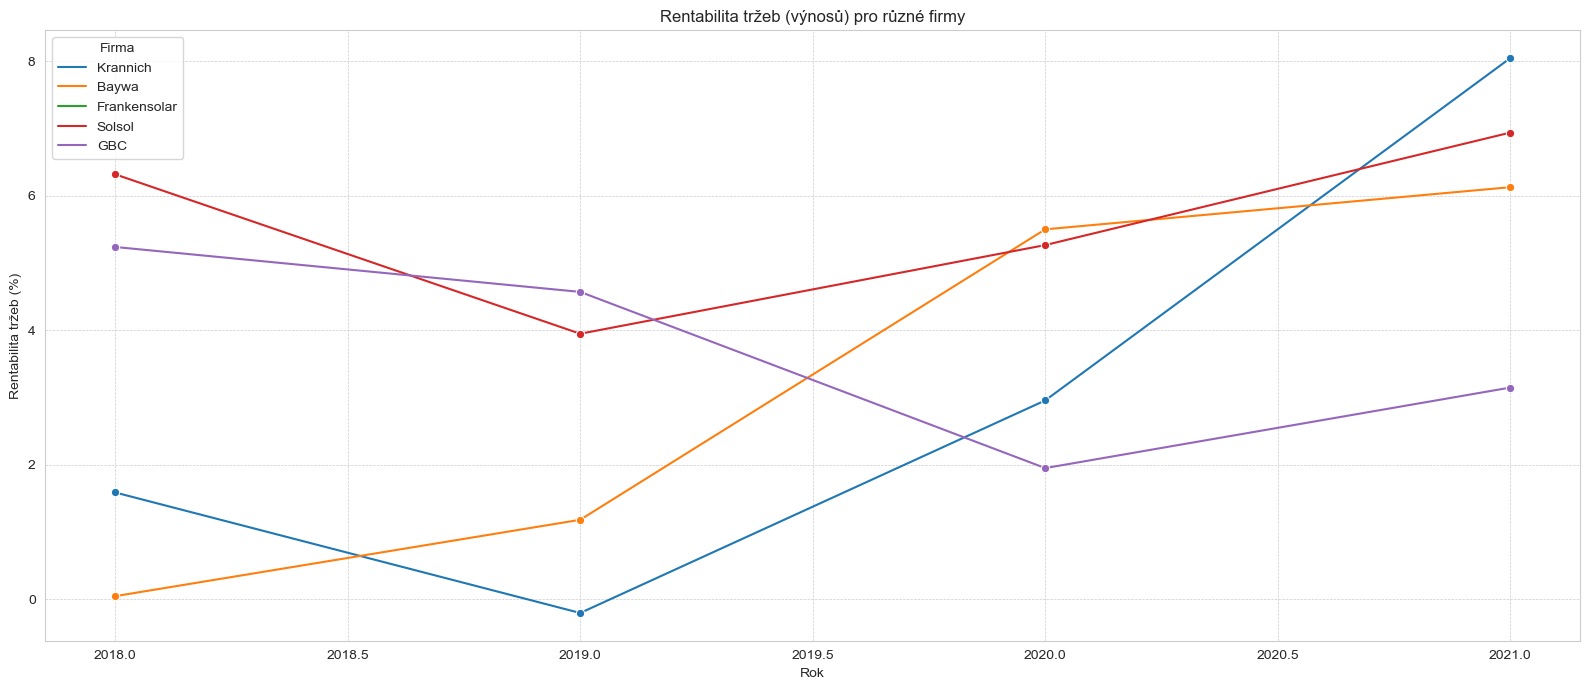

In [13]:
df['rentabilita_trzeb'] = df['cistyZisk'] / df['trzbyProdej'] * 100

plt.figure(figsize=(16,7))
sns.lineplot(data=df, x='rok', y='rentabilita_trzeb', hue='firma', marker="o", palette="tab10")
plt.title('Rentabilita tržeb (výnosů) pro různé firmy')
plt.ylabel('Rentabilita tržeb (%)')
plt.xlabel('Rok')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Firma')
plt.tight_layout()
plt.show()


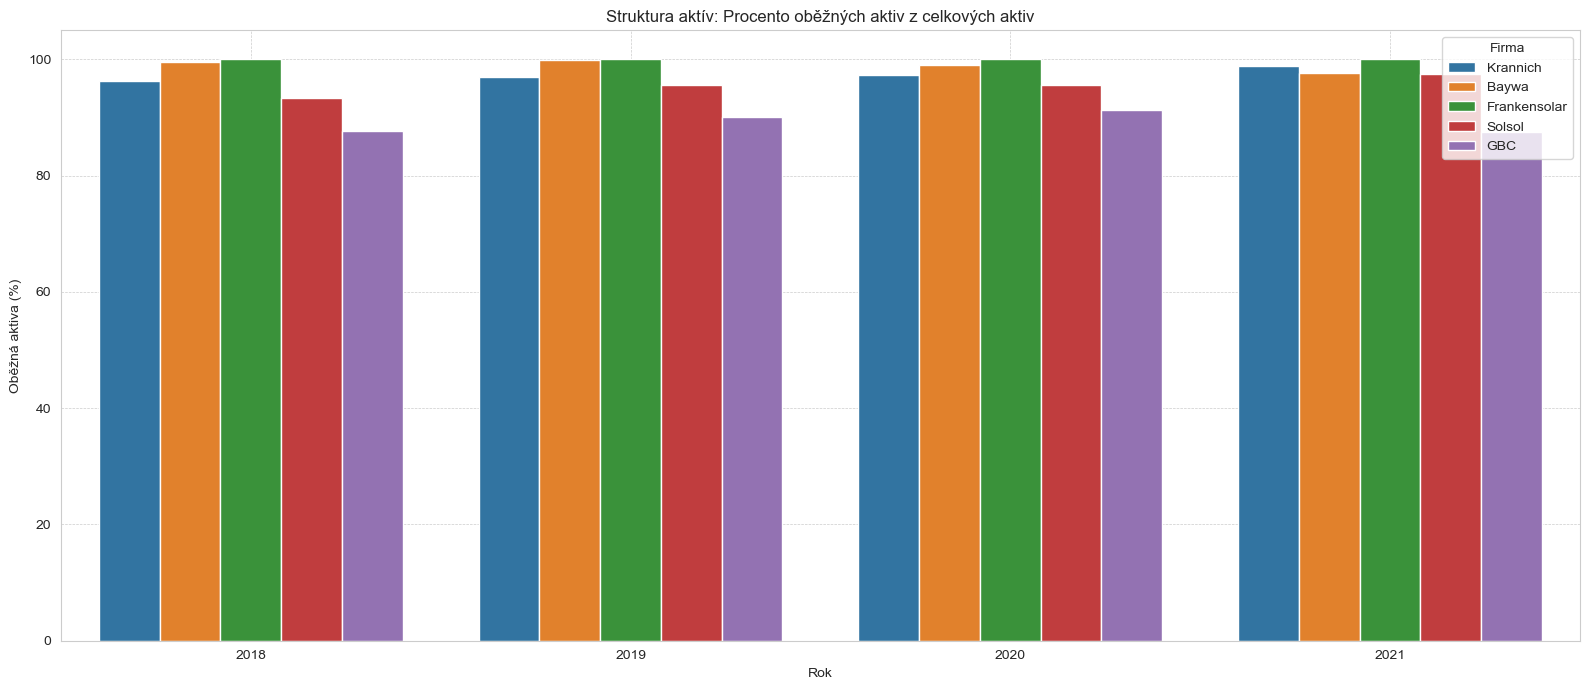

In [10]:
df['struktura_aktiv'] = df['obAktiva'] / df['celkAktiva'] * 100

plt.figure(figsize=(16,7))
sns.barplot(data=df, x='rok', y='struktura_aktiv', hue='firma', palette="tab10")
plt.title('Struktura aktív: Procento oběžných aktiv z celkových aktiv')
plt.ylabel('Oběžná aktiva (%)')
plt.xlabel('Rok')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Firma')
plt.tight_layout()
plt.show()


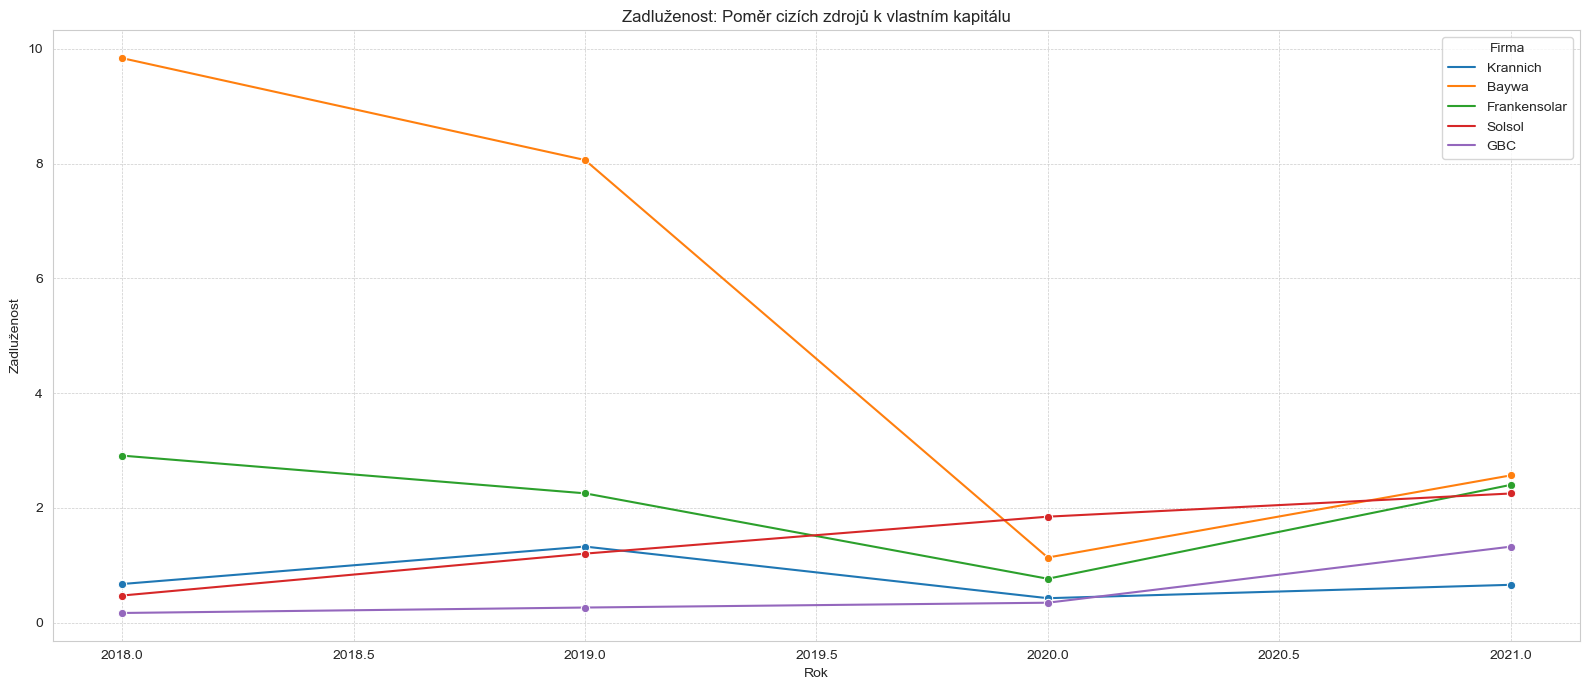

In [11]:
df['zadluzenost'] = (df['dlZavazky'] + df['krZavazky']) / df['vlKapital']

plt.figure(figsize=(16,7))
sns.lineplot(data=df, x='rok', y='zadluzenost', hue='firma', marker="o", palette="tab10")
plt.title('Zadluženost: Poměr cizích zdrojů k vlastním kapitálu')
plt.ylabel('Zadluženost')
plt.xlabel('Rok')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Firma')
plt.tight_layout()
plt.show()


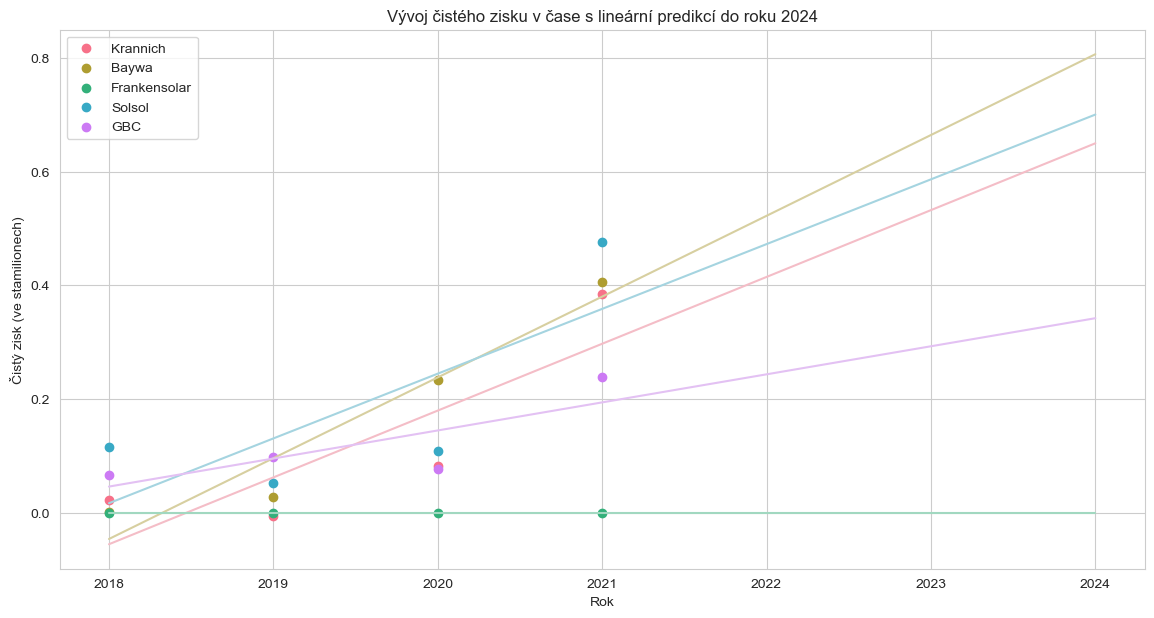

In [25]:
firmy = df['firma'].unique()

palette = sns.color_palette("husl", len(firmy))

plt.figure(figsize=(14,7))


for index, firma in enumerate(firmy):
    firma_data = df[df['firma'] == firma]
    X = firma_data[['rok']].values
    # Konverze zisku na stamiliony
    y = (firma_data['cistyZisk'].values) / 100000000
    plt.scatter(X, y, color=palette[index], label=firma)
    
    model = LinearRegression()
    model.fit(X, y)
    
    future_years = np.array([[2022], [2023], [2024]])
    X_future = np.concatenate([X, future_years])
    y_pred = model.predict(X_future)
    
    plt.plot(X_future, y_pred, color=sns.light_palette(palette[index])[2])

plt.xlabel('Rok')
plt.ylabel('Čistý zisk (ve stamilionech)')
plt.title('Vývoj čistého zisku v čase s lineární predikcí do roku 2024')
plt.legend()
plt.grid(True)
plt.show()

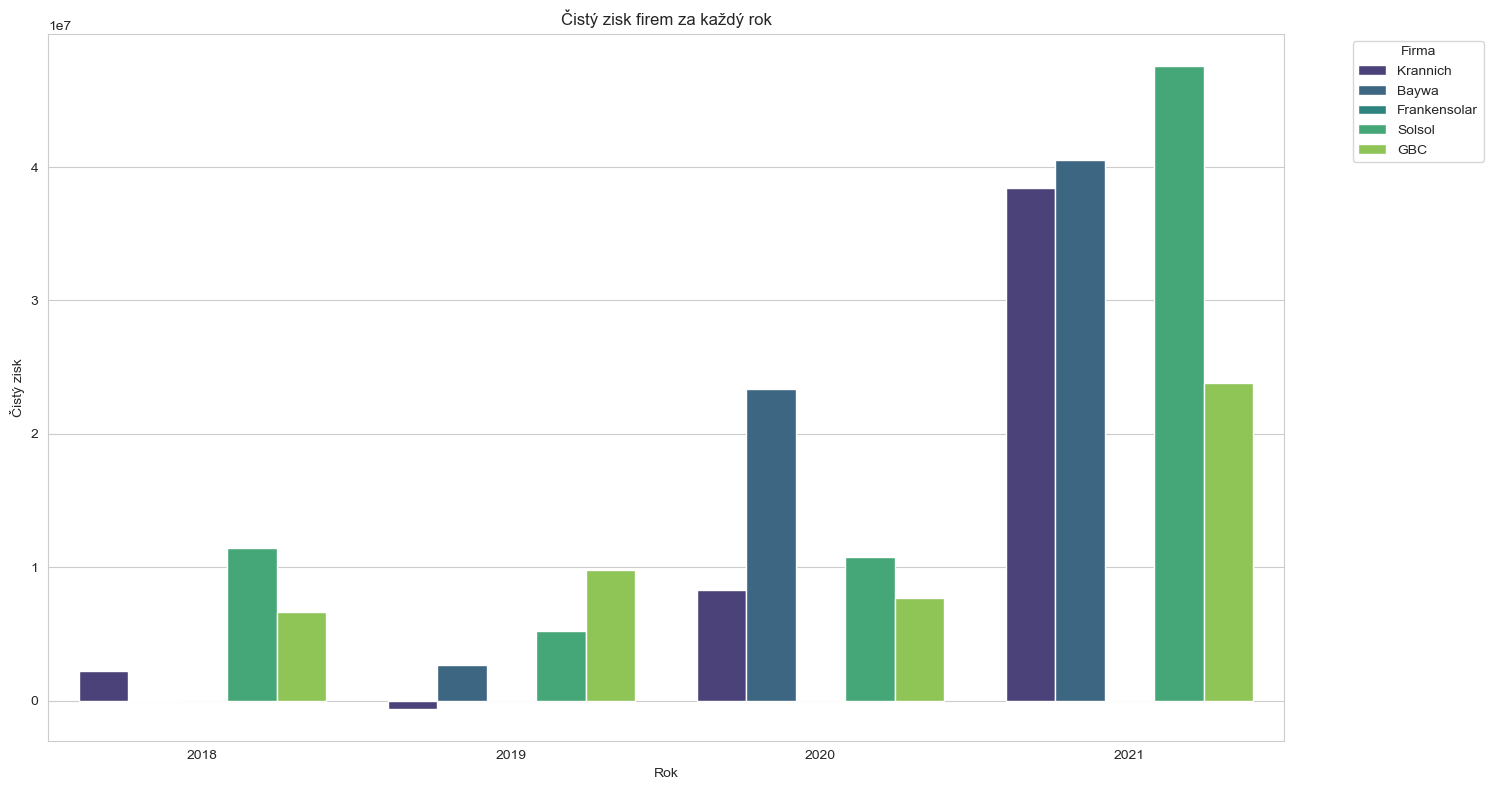

In [19]:
plt.figure(figsize=(15, 8))

sns.barplot(data=df, x='rok', y='cistyZisk', hue='firma', palette='viridis')
plt.title('Čistý zisk firem za každý rok')
plt.ylabel('Čistý zisk')
plt.xlabel('Rok')
plt.legend(title='Firma', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

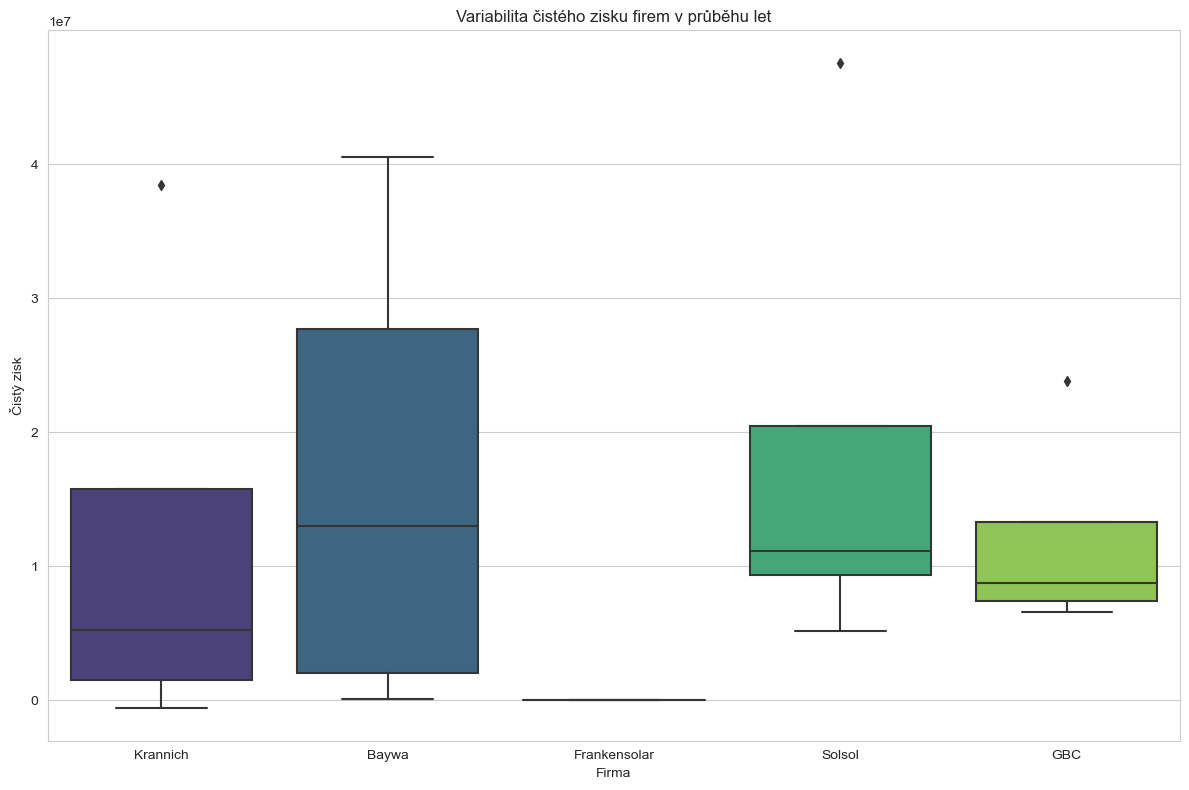

In [20]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=df, x='firma', y='cistyZisk', palette='viridis')
plt.title('Variabilita čistého zisku firem v průběhu let')
plt.ylabel('Čistý zisk')
plt.xlabel('Firma')

plt.tight_layout()
plt.show()